In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Reading the training data from the CSV file:
train = pd.read_csv("D:\\ML&DL PROJECTS\\titanic\\train.csv") 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Reading the testing data from the CSV file:
test = pd.read_csv("D:\\ML&DL PROJECTS\\titanic\\test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We pre-emptively extract and then remove the target variable from the training set. This allows us to concatenate the training and testing sets and work with a single dataframe for data cleaning instead of having to separately clean both the training and testing sets. It also allows us to standardise both the training and test data together as we will see later.

## Information about the combined dataset:


In [59]:
#Extracting the target variable from the training dataset and then dropping it.
train1 = train.copy()
y_tr = train1.Survived
train1.drop(['Survived'], axis = 1, inplace = True)

In [5]:
#Concatenating the training and testing set:
comb = pd.concat([train1,test], axis = 0, ignore_index= True)
comb.shape

(1309, 11)

In [6]:
#Information about the combined dataset:
comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


## Handling Null Values

In [7]:
#Checking null values:
comb.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
#Checking null percentages:
((comb.isnull().sum()/comb.isnull().count())*100).round(2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.09
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.08
Cabin          77.46
Embarked        0.15
dtype: float64

We can see that the 'Cabin' column has a very high percentage of missing values and therefore, we drop that column.

In [9]:
#Dropping the cabin column:
comb.drop(['Cabin'], axis = 1, inplace = True)
comb.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Since there are only 2 missing values in the 'Embarked' column, we replace them with the city where most passengers embarked.

In [10]:
#Filling the missing values in the embarked column with the mode of the column:
comb['Embarked'].fillna((comb['Embarked'].mode()[0]), inplace = True)

To fill in the missing age values, we use the median age of the passenger's honorific instead of using mean or median of the 'Age' column.

In [11]:
#Defining a function to extract the honorific from a name:
def honorific(name):
    record = False
    honorific = ''
    for i, char in enumerate(name):
        if char == ',':
            record = True
        if char == '.':
            record = False
        if record == True:
            honorific += name[i + 2]
    return honorific[:-1]

In [12]:
#Finding the honorifics of all the passengers:
honorifics = [honorific(name) for name in comb.Name]

In [13]:
#Creating a new "Honorific" column:
comb.insert(3, "Honorific", honorifics)
comb.head()

,PassengerId,Pclass,Name,Honorific,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",Mr.,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.,female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",Miss.,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.,female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",Mr.,male,35.0,0,0,373450,8.0500,S


In [14]:
#Checking the count of each unique honorific:
comb.Honorific.value_counts()

Mr.              757
Miss.            260
Mrs.             197
Master.           61
Rev.               8
Dr.                8
Col.               4
Mlle.              2
Major.             2
Ms.                2
Lady.              1
Sir.               1
Mme.               1
Don.               1
Capt.              1
the Countess.      1
Jonkheer.          1
Dona.              1
Name: Honorific, dtype: int64

In [15]:
#Checking the honorific-wise median age:
median_ages = pd.Series(comb.groupby(by = 'Honorific')['Age'].median())
median_ages.sort_values(ascending = False)


Honorific
Capt.            70.0
Col.             54.5
Dr.              49.0
Sir.             49.0
Major.           48.5
Lady.            48.0
Rev.             41.5
Don.             40.0
Dona.            39.0
Jonkheer.        38.0
Mrs.             35.5
the Countess.    33.0
Mr.              29.0
Ms.              28.0
Mme.             24.0
Mlle.            24.0
Miss.            22.0
Master.           4.0
Name: Age, dtype: float64

In [17]:
#Grouping the data by honorifics and filling the missing age values:
comb1 = pd.DataFrame(columns = comb.columns)

honorificGroup = comb.groupby(by = 'Honorific')
for _, df_honorific in honorificGroup:
    df_honorific['Age'].fillna(df_honorific['Age'].median(), inplace = True)
    comb1 = pd.concat([comb1, df_honorific], axis = 0)

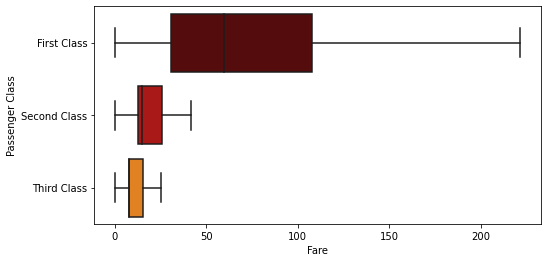

In [18]:
#Checking correlation between Pclass and Fare:
plt.figure(figsize = (8, 4))
sns.boxplot(y = comb1.Pclass, x = comb1.Fare, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Passenger Class')
plt.yticks([0,1,2], ['First Class','Second Class', 'Third Class'])
plt.show()

As we can see, there is a clear (negative) correlation between the passenger class (Pclass) and the ticket fare (Fare). Therefore, to fill in the missing fare values, we use the median fares of their respective passenger class instead of using mean or median of the 'Fare' column.

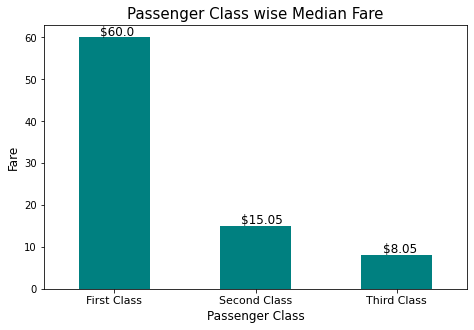

In [19]:
#Checking the passenger-class-wise median fare:
median_fares = pd.Series(comb1.groupby(by = 'Pclass')['Fare'].median())
plt.figure(figsize = (5,3))
median_fares.plot(kind = 'bar', color = 'teal')
plt.text(x = -0.1, y = median_fares.loc[1] + 0.5, s = "${}".format(median_fares.loc[1].round(2)), fontsize = 12)
plt.text(x = -0.1 + 1, y = median_fares.loc[2] + 0.5, s = "${}".format(median_fares.loc[2].round(2)), fontsize = 12)
plt.text(x = -0.1 + 2, y = median_fares.loc[3] + 0.5, s = "${}".format(median_fares.loc[3].round(2)), fontsize = 12)
plt.xlabel('Passenger Class', fontsize = 12)
plt.ylabel('Fare', fontsize = 12)
plt.title('Passenger Class wise Median Fare', fontsize = 15)
plt.xticks([0,1,2], ['First Class', 'Second Class', 'Third Class'], rotation = 'horizontal', fontsize = 11)
plt.tight_layout(pad = -5)
plt.show()

In [20]:
#Grouping the data by passenger-class and filling the missing 'Fare' values:
comb2 = pd.DataFrame(columns = comb1.columns)

pclassGroup = comb1.groupby(by = 'Pclass')
for _, df_pclass in pclassGroup:
    df_pclass['Fare'].fillna(df_pclass['Fare'].median(), inplace = True)
    comb2 = pd.concat([comb2, df_pclass], axis = 0)

In [21]:
#Re-checking for null values:
comb2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Honorific      0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All null values have been eliminated or imputed.

## Feature Engineering

## PassengerID
PassengerID is not a predictor of survival.

## Name
The length of the name may help predict survival, but that would be entirely coincidental. Instead we have extracted the honorifics of each passenger from their name which is a much more meaningful predictor of survival.

## Ticket
Ticket contains ticket numbers and in some cases contains some special alphanumeric words which may help predict survival, but that would require a certain amount of domain knowledge of the Titanic ship which we do not possess. Therefore, we will not use this feature.

## Sex

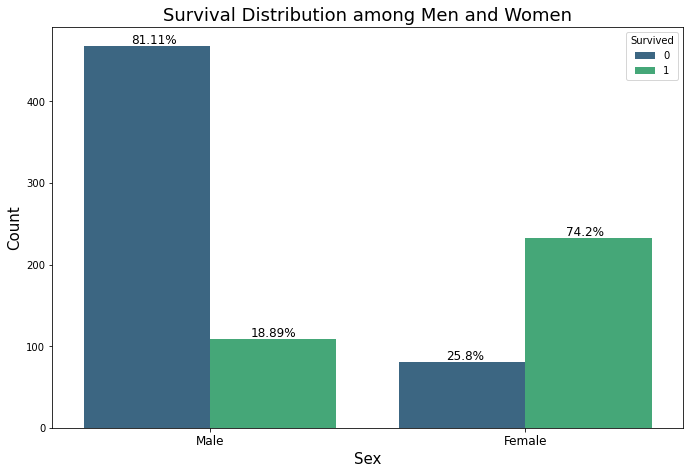

In [22]:
#Visualising Sex w.r.t Survival:
temp = pd.concat([comb2.sort_index().iloc[:891], y_train], axis = 1)
sexSurvival = temp.groupby(by = 'Sex')['Survived'].value_counts()
plt.figure(figsize = (8, 5))
sns.countplot(data = temp, x = 'Sex',  hue = 'Survived', palette = 'viridis')
plt.text(x = -0.25, y = sexSurvival['male'][0] + 3, s = "{}%".format(((sexSurvival['male'][0]/sexSurvival['male'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.13, y = sexSurvival['male'][1] + 3, s = "{}%".format(((sexSurvival['male'][1]/sexSurvival['male'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.25 + 1, y = sexSurvival['female'][0] + 3, s = "{}%".format(((sexSurvival['female'][0]/sexSurvival['female'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.13 + 1, y = sexSurvival['female'][1] + 3, s = "{}%".format(((sexSurvival['female'][1]/sexSurvival['female'].sum())*100).round(2)), fontsize = 12)
plt.title('Survival Distribution among Men and Women', fontsize = 18)
plt.xticks([0, 1], ['Male', 'Female'], fontsize = 12)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout(pad = -5)
plt.show()

It is clear from the above visualisation that more than 80% of men died whereas almost 75% of women survived. Therefore, sex is a distinct predictor of survival and no feature engineering is required.

## Passenger Class (Pclass)

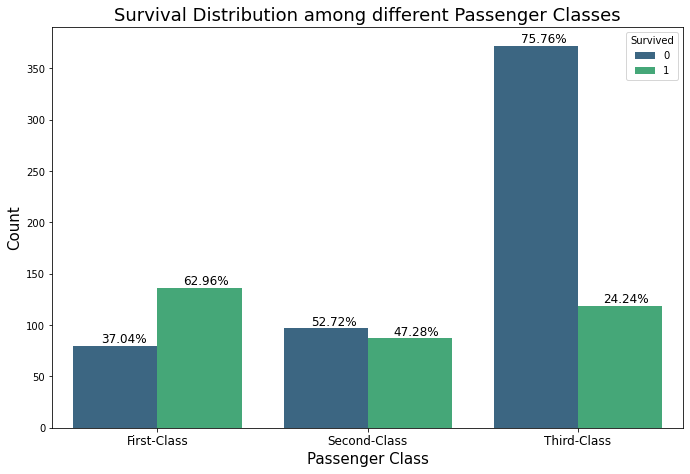

In [23]:
#Visualising Pclass w.r.t Survival:
pcSurvival = temp.groupby(by = 'Pclass')['Survived'].value_counts()
plt.figure(figsize = (8, 5))
sns.countplot(data = temp, x = 'Pclass',  hue = 'Survived', palette = 'viridis')
plt.text(x = -0.27, y = pcSurvival[1][0] + 3, s = "{}%".format(((pcSurvival[1][0]/pcSurvival[1].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.12, y = pcSurvival[1][1] + 3, s = "{}%".format(((pcSurvival[1][1]/pcSurvival[1].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 1, y = pcSurvival[2][0] + 3, s = "{}%".format(((pcSurvival[2][0]/pcSurvival[2].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.12 + 1, y = pcSurvival[2][1] + 3, s = "{}%".format(((pcSurvival[2][1]/pcSurvival[2].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 2, y = pcSurvival[3][0] + 3, s = "{}%".format(((pcSurvival[3][0]/pcSurvival[3].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.12 + 2, y = pcSurvival[3][1] + 3, s = "{}%".format(((pcSurvival[3][1]/pcSurvival[3].sum())*100).round(2)), fontsize = 12)
plt.title('Survival Distribution among different Passenger Classes', fontsize = 18)
plt.xticks([0, 1, 2], ['First-Class', 'Second-Class', 'Third-Class'], fontsize = 12)
plt.xlabel('Passenger Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout(pad = -5)
plt.show()

It is clear from the above visualisation that more than 75% of third-class passengers died whereas more than 60% of first-class passengers survived. The higher the passenger class, the higher is the survival rate and vice-versa. Therefore, passenger class is a distinct predictor of survival and no feature engineering is required.

## City of Embarkment (Embarked)


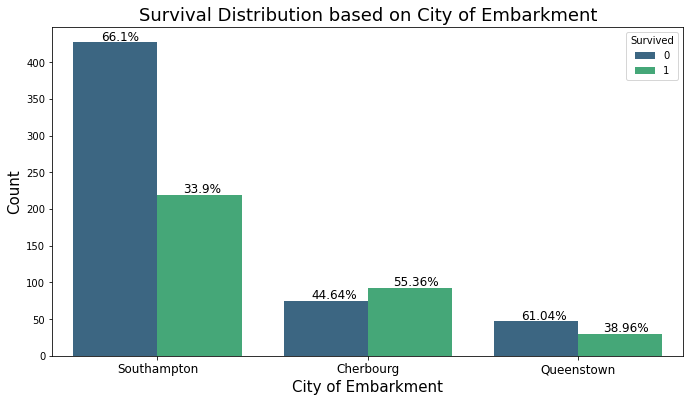

In [24]:
#Visualising Embarked w.r.t Survival:
ebSurvival = temp.groupby(by = 'Embarked')['Survived'].value_counts()
plt.figure(figsize = (8, 4))
sns.countplot(data = temp, x = 'Embarked',  hue = 'Survived', palette = 'viridis')
plt.text(x = -0.27, y = ebSurvival['S'][0] + 3, s = "{}%".format(((ebSurvival['S'][0]/ebSurvival['S'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.12, y = ebSurvival['S'][1] + 3, s = "{}%".format(((ebSurvival['S'][1]/ebSurvival['S'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 1, y = ebSurvival['C'][0] + 3, s = "{}%".format(((ebSurvival['C'][0]/ebSurvival['C'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.12 + 1, y = ebSurvival['C'][1] + 3, s = "{}%".format(((ebSurvival['C'][1]/ebSurvival['C'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 2, y = ebSurvival['Q'][0] + 3, s = "{}%".format(((ebSurvival['Q'][0]/ebSurvival['Q'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.12 + 2, y = ebSurvival['Q'][1] + 3, s = "{}%".format(((ebSurvival['Q'][1]/ebSurvival['Q'].sum())*100).round(2)), fontsize = 12)
plt.title('Survival Distribution based on City of Embarkment', fontsize = 18)
plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'], fontsize = 12)
plt.xlabel('City of Embarkment', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout(pad = -5)
plt.show()

It is clear from the visualisation that almost twice as many passengers from Southampton died as compared to those who survived. Passengers from Queenstown also have a poor survival rate at around 39%. Passengers from Cherbourg have the highest survival rate at 55%.
Embarkment also seems like a distinct predictor of survival and no feature engineering is required.

## Fare

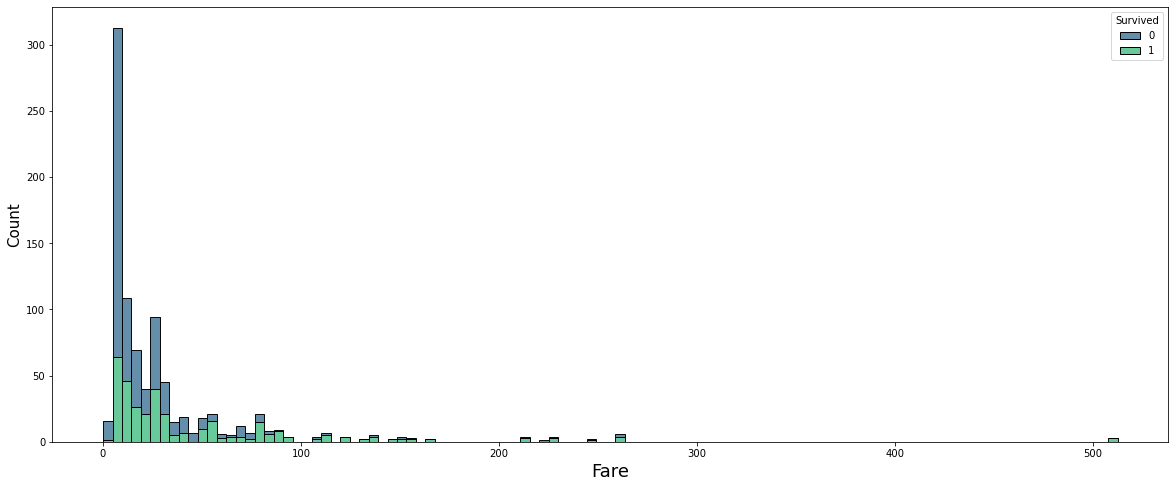

In [26]:
#Visualising the fare distribution w.r.t survival:
plt.figure(figsize = (20, 8))
sns.histplot(x = 'Fare', data = temp, hue = 'Survived', multiple = 'stack', palette = 'viridis')
plt.xlabel('Fare', fontsize = 18)
plt.ylabel('Count', fontsize = 15)
plt.show()

Let's try grouping the fares to see if fare groups provide a more distinct correlation with survival.

In [27]:
#Calculating the upper quartiles to determine the fare ranges (w.r.t passenger class):
fareGroupUpperLimits = {}
for pclass, df_pclass in pclassGroup:
    fareGroupUpperLimits[pclass] = df_pclass.Fare.quantile(0.75)
    
fareGroupUpperLimits
{1: 107.6625, 2: 26.0, 3: 15.2458}
#Creating fare groups:
comb2.insert(10, 'FareGroup', np.nan)

comb2.loc[(comb2.Fare <= fareGroupUpperLimits[3]), 'FareGroup'] = 'LowFare'
comb2.loc[(comb2.Fare > fareGroupUpperLimits[3]) & (comb2.Fare <= fareGroupUpperLimits[2]), 'FareGroup'] = 'MediumFare'
comb2.loc[(comb2.Fare > fareGroupUpperLimits[2]), 'FareGroup'] = 'HighFare'

comb2.sample(8)

,PassengerId,Pclass,Name,Honorific,Sex,Age,SibSp,Parch,Ticket,Fare,FareGroup,Embarked
503,504,3,"Laitinen, Miss. Kristina Sofia",Miss.,female,37.0,0,0,4135,9.5875,LowFare,S
1308,1309,3,"Peter, Master. Michael J",Master.,male,4.0,1,1,2668,22.3583,MediumFare,C
576,577,2,"Garside, Miss. Ethel",Miss.,female,34.0,0,0,243880,13.0000,LowFare,S
262,263,1,"Taussig, Mr. Emil",Mr.,male,52.0,1,1,110413,79.6500,HighFare,S
216,217,3,"Honkanen, Miss. Eliina",Miss.,female,27.0,0,0,STON/O2. 3101283,7.9250,LowFare,S
317,318,2,"Moraweck, Dr. Ernest",Dr.,male,54.0,0,0,29011,14.0000,LowFare,S
1046,1047,3,"Duquemin, Mr. Joseph",Mr.,male,24.0,0,0,S.O./P.P. 752,7.5500,LowFare,S
846,847,3,"Sage, Mr. Douglas Bullen",Mr.,male,29.0,8,2,CA. 2343,69.5500,HighFare,S


The fare groups are as follows:

1. Low Fare Group: $0 - $15.24<br>
2. Medium Fare Group: $15.24 - $26.0 
3. High Fare Group: $26.0 - $107.66 

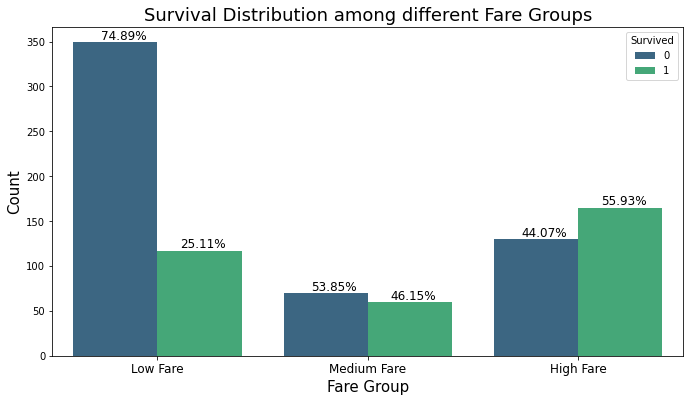

In [28]:
#Visualising the fare group distribution w.r.t survival:
temp = pd.concat([comb2.sort_index().iloc[:891], y_train], axis = 1)
fgSurvival = temp.groupby(by = 'FareGroup')['Survived'].value_counts()
plt.figure(figsize = (8, 4))
sns.countplot(data = temp, x = 'FareGroup',  hue = 'Survived', order = ['LowFare', 'MediumFare', 'HighFare'], palette = 'viridis')
plt.text(x = -0.27, y = fgSurvival['LowFare'][0] + 3, s = "{}%".format(((fgSurvival['LowFare'][0]/fgSurvival['LowFare'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.11, y = fgSurvival['LowFare'][1] + 3, s = "{}%".format(((fgSurvival['LowFare'][1]/fgSurvival['LowFare'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 1, y = fgSurvival['MediumFare'][0] + 3, s = "{}%".format(((fgSurvival['MediumFare'][0]/fgSurvival['MediumFare'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.11 + 1, y = fgSurvival['MediumFare'][1] + 3, s = "{}%".format(((fgSurvival['MediumFare'][1]/fgSurvival['MediumFare'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 2, y = fgSurvival['HighFare'][0] + 3, s = "{}%".format(((fgSurvival['HighFare'][0]/fgSurvival['HighFare'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.11 + 2, y = fgSurvival['HighFare'][1] + 3, s = "{}%".format(((fgSurvival['HighFare'][1]/fgSurvival['HighFare'].sum())*100).round(2)), fontsize = 12)
plt.xlabel('Fare Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks([0, 1, 2], ['Low Fare', 'Medium Fare', 'High Fare'], fontsize = 12)
plt.title('Survival Distribution among different Fare Groups', fontsize = 18)
plt.tight_layout(pad = -5)
plt.show()


From the above visualisation, it's much more clear that in the low fare group, the death rate is three times higher than the survival rate. In the high fare group, about 10% more passengers survived as compared to the the percentage of people who died. The survival-death disparity is low in the middle fare group yet the trend is clear: the higher the fare group, the higher the survival rate. Therefore, fare groups are a distinct predictor of surival and no further feature engineering is required.

## Number of Parents or Children (Parch) and Number of Siblings or Spouses (SibSp)¶


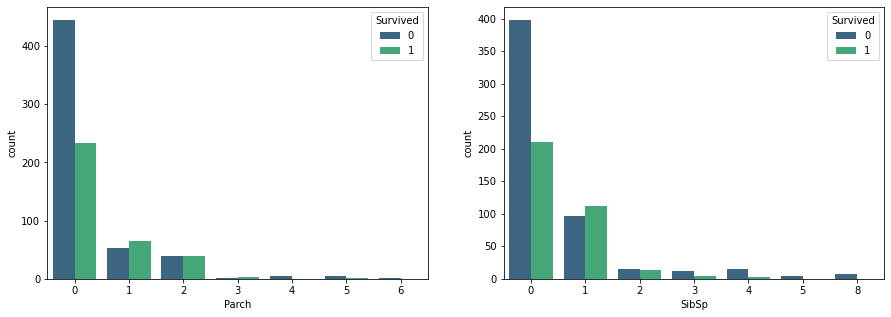

In [29]:
#Visualising number of parents or children (Parch) and number of siblings or spouses (SibSp) w.r.t Survival:
temp = pd.concat([comb2.sort_index().iloc[:891], y_train], axis = 1)
cols = ['Parch', 'SibSp']
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
for col, subplot in zip(cols, ax.flatten()):
    sns.countplot(data = temp, x = col,  hue = 'Survived', ax = subplot, palette = 'viridis')
    subplot.legend(loc = 'upper right', title = 'Survived')
plt.show()

Let's create another feature called FamilyCount which is the number of family members the passenger has aboard the ship (including themselves).

In [30]:
#Creating FamilyCount out of Parch and SibSp:
comb2['FamilyCount'] = 1 + comb2['SibSp'] + comb2['Parch']
comb2.head()

,PassengerId,Pclass,Name,Honorific,Sex,Age,SibSp,Parch,Ticket,Fare,FareGroup,Embarked,FamilyCount
745,746,1,"Crosby, Capt. Edward Gifford",Capt.,male,70.0,1,1,WE/P 5735,71.000,HighFare,S,3
647,648,1,"Simonius-Blumer, Col. Oberst Alfons",Col.,male,56.0,0,0,13213,35.500,HighFare,C,1
694,695,1,"Weir, Col. John",Col.,male,60.0,0,0,113800,26.550,HighFare,S,1
1022,1023,1,"Gracie, Col. Archibald IV",Col.,male,53.0,0,0,113780,28.500,HighFare,C,1
1093,1094,1,"Astor, Col. John Jacob",Col.,male,47.0,1,0,PC 17757,227.525,HighFare,C,2


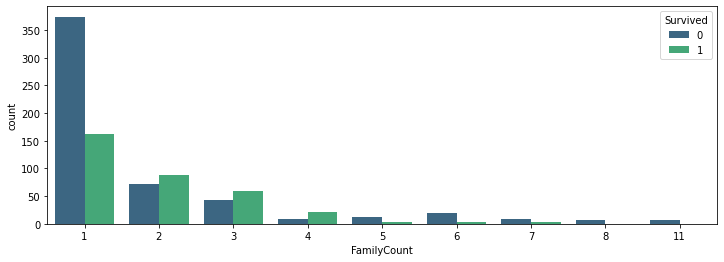

In [31]:
#Visualising number of family members against survival:
temp = pd.concat([comb2.sort_index().iloc[:891], y_train], axis = 1)
plt.figure(figsize = (12, 4))
sns.countplot(data = temp, x = 'FamilyCount', hue = 'Survived', palette = 'viridis')
plt.legend(loc = 'upper right', title = 'Survived')
plt.show()

From the above visualisation, we can see that when the passenger is alone, there's a very high chance of dying. When the family count is 2, 3 or 4, the chances of surviving are slightly higher. For large families (FamilyCount > 4), the chances of dying are again higher than the chances of surviving. Therefore, we split the family count accordingly into 3 distinct groups.

In [32]:
#Creating another feature FamilySize based on groups of family count:
comb2.insert(8, 'FamilySize', np.nan)

comb2.loc[(comb2.FamilyCount == 1), 'FamilySize'] = 'Alone'
comb2.loc[(comb2.FamilyCount > 1) & (comb2.FamilyCount <= 4), 'FamilySize'] = 'Medium'
comb2.loc[(comb2.FamilyCount > 4), 'FamilySize'] = 'Large'

comb2.sample(5)

,PassengerId,Pclass,Name,Honorific,Sex,Age,SibSp,Parch,FamilySize,Ticket,Fare,FareGroup,Embarked,FamilyCount
672,673,2,"Mitchell, Mr. Henry Michael",Mr.,male,70.0,0,0,Alone,C.A. 24580,10.5000,LowFare,S,1
117,118,2,"Turpin, Mr. William John Robert",Mr.,male,29.0,1,0,Medium,11668,21.0000,MediumFare,S,2
19,20,3,"Masselmani, Mrs. Fatima",Mrs.,female,35.5,0,0,Alone,2649,7.2250,LowFare,C,1
103,104,3,"Johansson, Mr. Gustaf Joel",Mr.,male,33.0,0,0,Alone,7540,8.6542,LowFare,S,1
361,362,2,"del Carlo, Mr. Sebastiano",Mr.,male,29.0,1,0,Medium,SC/PARIS 2167,27.7208,HighFare,C,2


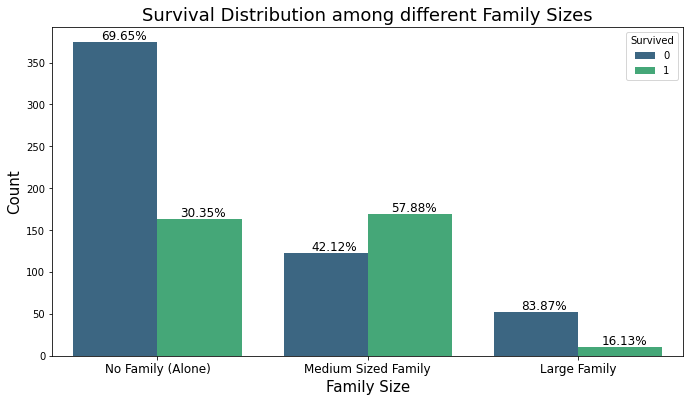

In [33]:
#Visualising family sizes against survival:
temp = pd.concat([comb2.sort_index().iloc[:891], y_train], axis = 1)
fsSurvival = temp.groupby(by = 'FamilySize')['Survived'].value_counts()
plt.figure(figsize = (8, 4))
sns.countplot(data = temp, x = 'FamilySize', hue = 'Survived', order = ['Alone', 'Medium', 'Large'], palette = 'viridis')
plt.text(x = -0.27, y = fsSurvival['Alone'][0] + 3, s = "{}%".format(((fsSurvival['Alone'][0]/fsSurvival['Alone'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.11, y = fsSurvival['Alone'][1] + 3, s = "{}%".format(((fsSurvival['Alone'][1]/fsSurvival['Alone'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 1, y = fsSurvival['Medium'][0] + 3, s = "{}%".format(((fsSurvival['Medium'][0]/fsSurvival['Medium'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.11 + 1, y = fsSurvival['Medium'][1] + 3, s = "{}%".format(((fsSurvival['Medium'][1]/fsSurvival['Medium'].sum())*100).round(2)), fontsize = 12)
plt.text(x = -0.27 + 2, y = fsSurvival['Large'][0] + 3, s = "{}%".format(((fsSurvival['Large'][0]/fsSurvival['Large'].sum())*100).round(2)), fontsize = 12)
plt.text(x = 0.11 + 2, y = fsSurvival['Large'][1] + 3, s = "{}%".format(((fsSurvival['Large'][1]/fsSurvival['Large'].sum())*100).round(2)), fontsize = 12)
plt.xlabel('Family Size', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks([0, 1, 2], ['No Family (Alone)', 'Medium Sized Family', 'Large Family'], fontsize = 12)
plt.title('Survival Distribution among different Family Sizes', fontsize = 18)
plt.tight_layout(pad = -5)
plt.show()

The relationship between family sizes and survival becomes much more distinct using family size groups (as opposed to using Parch and SibSp). A passenger from a large family has more than 80% chance of dying and passenger with no family aboard has almost 70% chance of dying. Medium sized families have the highest survival rate at almost 58%.
Therefore, family sizes (independently) are distinct predictors of survival and no further feature engineering is required.

## Age

C:\Users\heman\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


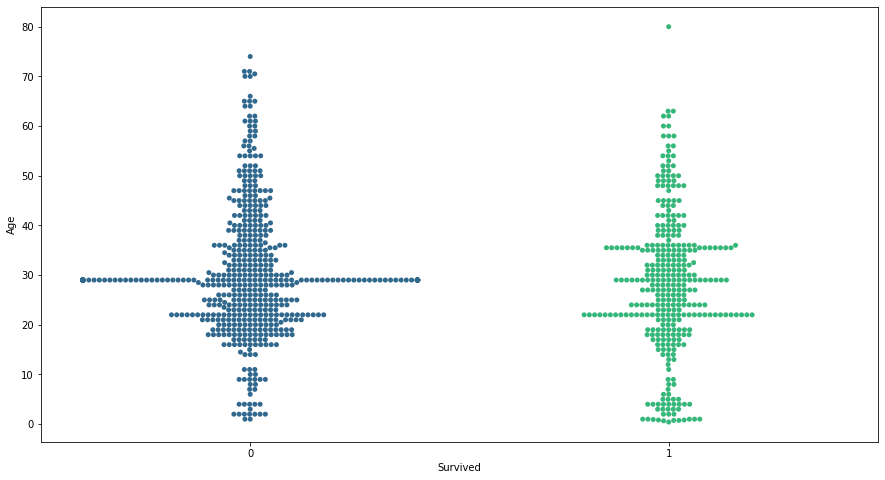

In [35]:
#Visualising the age distribution w.r.t survival:
temp = pd.concat([comb2.sort_index().iloc[:891], y_train], axis = 1)
plt.figure(figsize = (15,8))
sns.swarmplot(data = temp, x = 'Survived', y = 'Age', palette = 'viridis')
plt.show()

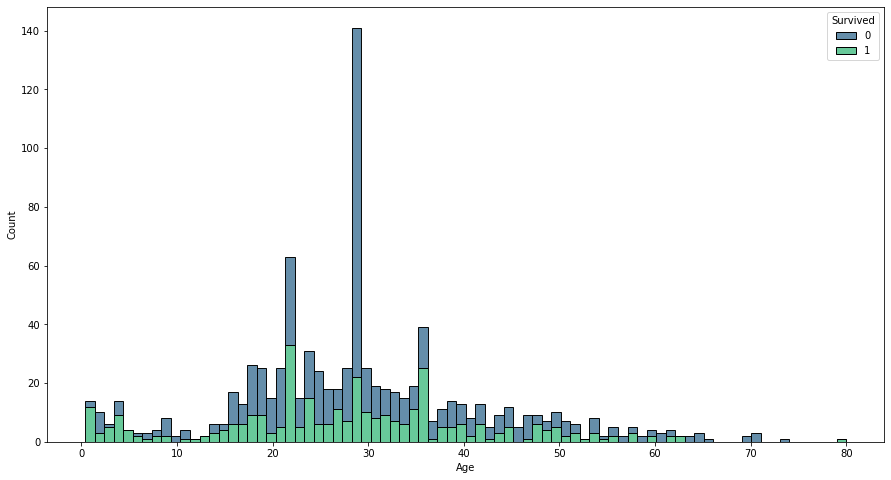

In [36]:
#Visualising ages w.r.t survival:
plt.figure(figsize = (15, 8))
sns.histplot(data = temp, x = 'Age', hue = 'Survived', multiple = 'stack', bins = 80, palette = 'viridis')
plt.show()

From the above visualisations, there doesn't seem to be a very distinct correlation between age and survival.
We see that passengers above the age of 60 are almost guaranteed to die but exceptions exist in ages 62, 63 and 80 with ages 63 and 80 fully surviving.
Only the kids aged 1-6 have a higher survival rate than death rate but among 2 year old kids, the death rate is twice as high as the survival rate.
With such irregularities in survival rates among different ages, it's difficult to make meaningful age groups.

In [37]:
#Dropping columns that are no longer required:
comb2.drop(['PassengerId', 'Name', 'Ticket', 'Parch', 'SibSp', 'FamilyCount', 'Fare'], axis  = 1, inplace = True)
comb2.head()

,Pclass,Honorific,Sex,Age,FamilySize,FareGroup,Embarked
745,1,Capt.,male,70.0,Medium,HighFare,S
647,1,Col.,male,56.0,Alone,HighFare,C
694,1,Col.,male,60.0,Alone,HighFare,S
1022,1,Col.,male,53.0,Alone,HighFare,C
1093,1,Col.,male,47.0,Medium,HighFare,C


In [38]:
#Checking the datatypes of the features in the dataframe:
comb2.dtypes

Pclass         object
Honorific      object
Sex            object
Age           float64
FamilySize     object
FareGroup      object
Embarked       object
dtype: object

In [39]:
#Dummy Encoding the categorical variables:
categoricals = comb2.select_dtypes(exclude = ['int64', 'float64'])
categorical_dummies = pd.get_dummies(categoricals, drop_first = False)
categorical_dummies.head()

,Pclass_1,Pclass_2,Pclass_3,Honorific_Capt.,Honorific_Col.,Honorific_Don.,Honorific_Dona.,Honorific_Dr.,Honorific_Jonkheer.,Honorific_Lady.,...,Sex_male,FamilySize_Alone,FamilySize_Large,FamilySize_Medium,FareGroup_HighFare,FareGroup_LowFare,FareGroup_MediumFare,Embarked_C,Embarked_Q,Embarked_S
745,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
647,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
694,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
1022,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
1093,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0


In [40]:
#Fetching the numerical columns:
numericals = comb2.drop(categoricals, axis = 1)
numericals.head()

,Age
745,70.0
647,56.0
694,60.0
1022,53.0
1093,47.0


## Honorific

Creating honorific groups by combining honorifics with similar properties.

    

In [41]:
#Combining unmarried women into a single feature:
categorical_dummies['YoungWomen'] = categorical_dummies['Honorific_Miss.'] + categorical_dummies['Honorific_Mlle.']

#Combining married women into a single feature:
categorical_dummies['MarriedWomen'] = categorical_dummies['Honorific_Mrs.'] + categorical_dummies['Honorific_Mme.'] + categorical_dummies['Honorific_Ms.']

#Combining the rarer honorifics into a single feature:
categorical_dummies['RareHonorific'] = categorical_dummies['Honorific_Capt.'] + categorical_dummies['Honorific_Col.'] + categorical_dummies['Honorific_Don.'] + categorical_dummies['Honorific_Dona.'] + categorical_dummies['Honorific_Dr.'] + categorical_dummies['Honorific_Jonkheer.']  + categorical_dummies['Honorific_Lady.'] + categorical_dummies['Honorific_Major.'] + categorical_dummies['Honorific_Sir.'] + categorical_dummies['Honorific_the Countess.'] + categorical_dummies['Honorific_Rev.']

In [42]:
#Dropping all the features that have since been combined into a new feature:
categorical_dummies.drop(['Honorific_Miss.', 'Honorific_Mlle.', 'Honorific_Mrs.', 'Honorific_Mme.', 'Honorific_Ms.', 'Honorific_Dona.', 'Honorific_Lady.', 'Honorific_the Countess.', 'Honorific_Rev.', 'Honorific_Jonkheer.', 'Honorific_Capt.', 'Honorific_Col.', 'Honorific_Major.', 'Honorific_Don.', 'Honorific_Sir.', 'Honorific_Dr.'], 
                         axis = 1, inplace = True)

categorical_dummies.head()

,Pclass_1,Pclass_2,Pclass_3,Honorific_Master.,Honorific_Mr.,Sex_female,Sex_male,FamilySize_Alone,FamilySize_Large,FamilySize_Medium,FareGroup_HighFare,FareGroup_LowFare,FareGroup_MediumFare,Embarked_C,Embarked_Q,Embarked_S,YoungWomen,MarriedWomen,RareHonorific
745,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1
647,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
694,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
1022,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1093,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1


In [43]:
#Re-combining the numerical and categorical variables:
x = pd.concat([numericals, categorical_dummies], axis = 1)
x.head()

,Age,Pclass_1,Pclass_2,Pclass_3,Honorific_Master.,Honorific_Mr.,Sex_female,Sex_male,FamilySize_Alone,FamilySize_Large,FamilySize_Medium,FareGroup_HighFare,FareGroup_LowFare,FareGroup_MediumFare,Embarked_C,Embarked_Q,Embarked_S,YoungWomen,MarriedWomen,RareHonorific
745,70.0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1
647,56.0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
694,60.0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
1022,53.0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1093,47.0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1


In [44]:
#Sorting the whole data by index:
x = x.sort_index(ascending = True)
x.tail()

,Age,Pclass_1,Pclass_2,Pclass_3,Honorific_Master.,Honorific_Mr.,Sex_female,Sex_male,FamilySize_Alone,FamilySize_Large,FamilySize_Medium,FareGroup_HighFare,FareGroup_LowFare,FareGroup_MediumFare,Embarked_C,Embarked_Q,Embarked_S,YoungWomen,MarriedWomen,RareHonorific
1304,29.0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0
1305,39.0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
1306,38.5,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0
1307,29.0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0
1308,4.0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0


## Checking Correlation


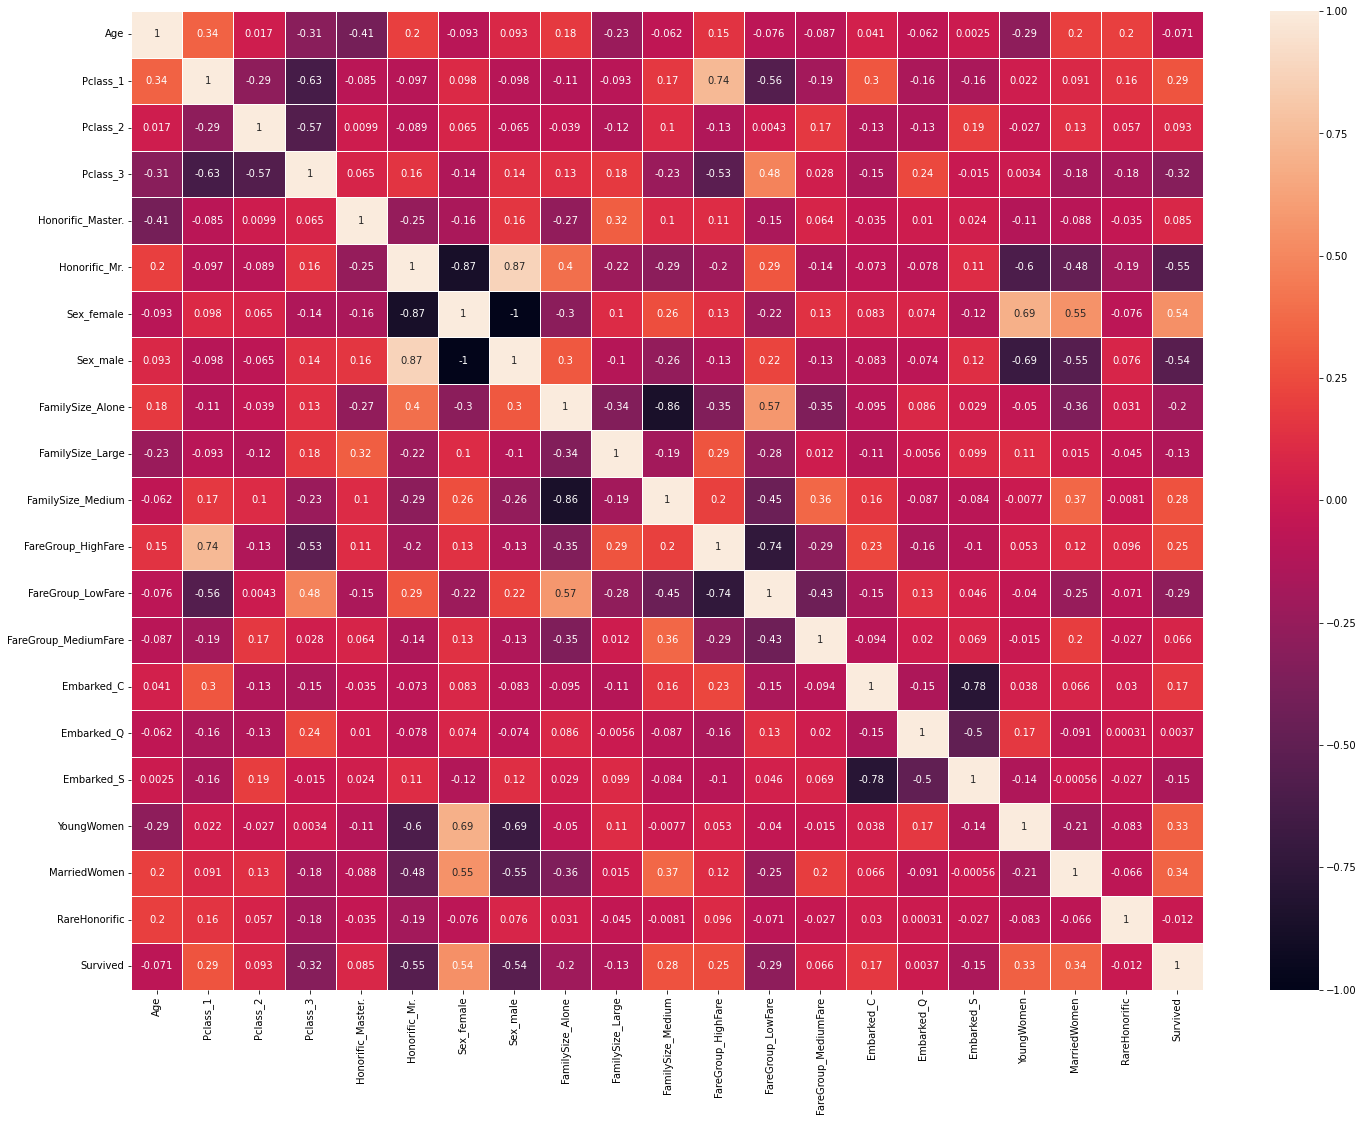

In [45]:
#Correlation check:
temp = pd.concat([x.iloc[:891], y_train], axis = 1)
corr = temp.corr()
plt.figure(figsize = (24,18))
sns.heatmap(corr, cbar = True, annot = True, linewidths = 0.5)
plt.show()

We do not need to worry about multicollinearities because we're using a Random Forest which implements bagging (picking random features and rows).

## Scaling the Features¶


In [48]:
#Scaling the independent features:
scaler = StandardScaler()
scaler.fit(x)
X = scaler.fit_transform(x)

## Splitting the Data back into Training and Testing Sets¶


In [56]:
#Splitting the transformed data back into training and testing sets:
x_tr = X[:891]
x_te = X[891:]

## Random Forest


In [57]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
m1= RandomForestClassifier()
m1.fit(x_tr,y_tr)

RandomForestClassifier()

In [66]:
print('training Score',m1.score(x_tr,y_tr))

ypred_m1=m1.predict(x_te)
print(ypred_m1)

training Score 0.9349046015712682
[0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0
 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0
 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [67]:
pred=pd.DataFrame(ypred_m1)
sub_df=pd.read_csv("D:\\ML&DL PROJECTS\\titanic\\gender_submission.csv")
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=["PassengerId",'Servived']
datasets

,PassengerId,Servived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [68]:
datasets.to_csv("D:\\ML&DL PROJECTS\\titanic\\gender_submission.csv",index=False)